In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.text import Annotation
from matplotlib import rc

import seaborn as sns
from scipy.optimize import minimize
import pymc3 as pm
from tqdm import tqdm
import scipy.stats as st
import corner
import warnings
from IPython.display import Latex
from gzbuilder_analysis import load_fit_results

warnings.simplefilter('ignore', UserWarning)

In [3]:
INPUT_FILE = 'n139d1000t500.pickle'

In [4]:
res = pd.read_pickle(INPUT_FILE)
bhsm = res['model']
trace = res['trace']

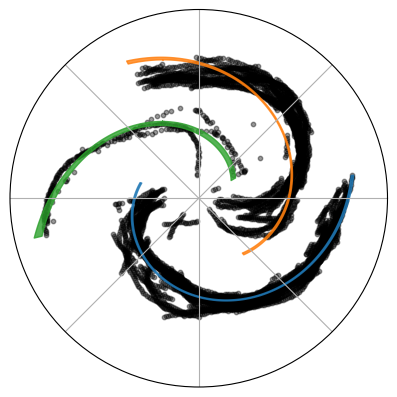

In [5]:
def plot_galaxy_fit(sid, markersize=1, r_err_alpha=0.2, phi_err_alpha=0.8):
    idx = np.where(bhsm.galaxies.index.values == sid)[0][0]
    phi_arm_samples = trace.phi_arm[:, bhsm.gal_arm_map == idx].T
    c_samples = trace.c[:, bhsm.gal_arm_map == idx].T
    r_err = trace.sigma_r.mean()
    for i, arm in enumerate(bhsm.galaxies.loc[sid]):
        plt.scatter(*arm, c='k', s=markersize, alpha=0.4)
        t_pred = np.expand_dims(np.linspace(arm[0].min(), arm[0].max(), 200), -1)
        r_pred = np.exp(np.tan(np.deg2rad(phi_arm_samples[i])) * t_pred + c_samples[i])
        r_mn = r_pred.mean(axis=1)
        r_sd = r_pred.std(axis=1)
#         plt.fill_between(t_pred[:, 0], r_mn - r_err, r_mn + r_err, color=f'r', alpha=r_err_alpha)
        plt.fill_between(t_pred[:, 0], r_mn - 2 * r_sd, r_mn + 2 * r_sd, color=f'C{i}', alpha=phi_err_alpha)


plt.figure(figsize=(5, 5), dpi=100)
plt.subplot(1, 1, 1, projection='polar')
plot_galaxy_fit(20902011, markersize=10)

plt.xticks(plt.xticks()[0], [])
plt.yticks([]);

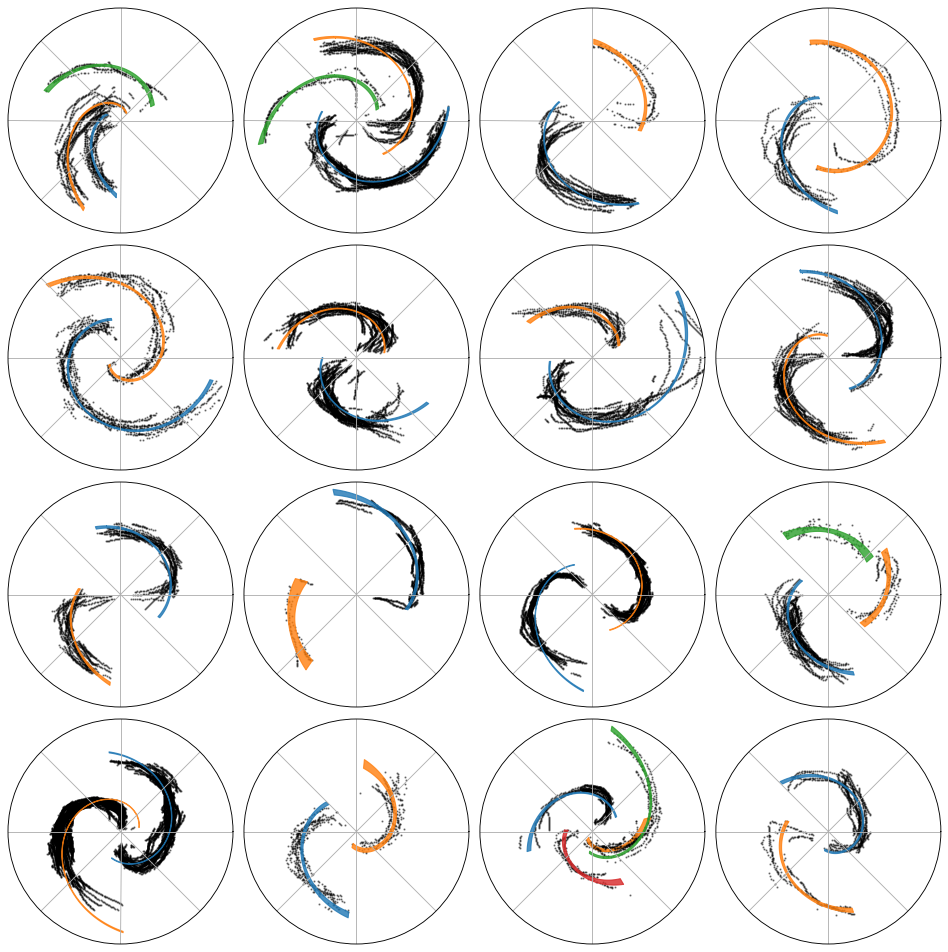

In [6]:
N = 4
gal_choice_ids = np.array([
    20901998, 20902011, 20902024, 20902026,
    20902040, 20902047, 20902051, 20902053,
    20902057, 20902063, 20902064, 20902067,
    20902077, 21096850, 21096867, 21096902,
    21096917, 21096950, 21097016
])

plt.figure(figsize=(12, 12), dpi=80)
for i in range(N):
    for j in range(N):
        idx = N * i + j
        plt.subplot(N, N, idx + 1, projection='polar')
        plot_galaxy_fit(gal_choice_ids[idx])
        plt.xticks(plt.xticks()[0], [])
        plt.yticks([])
plt.tight_layout()
plt.savefig('plots/example-spiral-fits.pdf', bbox_inches='tight')
plt.savefig('plots/example-spiral-fits.png', bbox_inches='tight')